# Challenge 2: Model that predicts a gem's worth based on its characteristics

Author: Giacomo Rossi

Repository: [1giacomo/xtream-ai-assignment](https://github.com/1giacomo/xtream-ai-assignment)

LinkedIn: [giacomo-rossi-100](https://www.linkedin.com/in/giacomo-rossi-100/)

[Go to Challenge 1](https://colab.research.google.com/drive/1wkIHYESKVFetaFaZ9ZWnE3EZC6939grY)

## Load the dataset

In [39]:
# Clone the dataset from Github
!git clone https://github.com/1giacomo/xtream-ai-assignment.git

fatal: destination path 'xtream-ai-assignment' already exists and is not an empty directory.


In [40]:
# Load the dataset from the .csv file
import pandas as pd
diamonds = pd.read_csv("./xtream-ai-assignment/datasets/diamonds/diamonds.csv")

In [41]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82


## Preparing the data

### Data cleaning

In [42]:
cleaned_diamonds = diamonds[diamonds['price'] > 0][diamonds['x'] > 0][diamonds['y'] > 0][diamonds['z'] > 0]


<ipython-input-42-eb113cd84528>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_diamonds = diamonds[diamonds['price'] > 0][diamonds['x'] > 0][diamonds['y'] > 0][diamonds['z'] > 0]


### Encode the variables

Convert categorical variables into scalars.


In [43]:
cut_mapping_dict = {
    "Ideal": 4,
    "Premium": 3,
    "Very Good": 2,
    "Good": 1,
    "Fair": 0,
}

clarity_mapping_dict = {
    "IF": 7,
    "VVS1": 6,
    "VVS2": 5,
    "VS1": 4,
    "VS2": 3,
    "SI1": 2,
    "SI2": 1,
    "I1": 0
}

cleaned_diamonds['cut'] = cleaned_diamonds['cut'].replace(cut_mapping_dict)
cleaned_diamonds['color'] = cleaned_diamonds['color'].apply(lambda x: ord('Z') - ord(x))
cleaned_diamonds['clarity'] = cleaned_diamonds['clarity'].replace(clarity_mapping_dict)

In [44]:
cleaned_diamonds.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000
mean,0.794117,2.900581,19.392463,3.059130,61.710844,57.446242,3930.581880,5.726232,5.728821,3.533678
std,0.467981,1.122123,1.691265,1.631902,1.445563,2.259752,3970.923311,1.116257,1.109167,0.688437
min,0.230000,0.000000,16.000000,0.000000,44.000000,51.600000,351.000000,3.860000,3.840000,1.410000
25%,0.400000,2.000000,18.000000,2.000000,61.000000,56.000000,942.000000,4.700000,4.710000,2.900000
50%,0.700000,3.000000,19.000000,3.000000,61.800000,57.000000,2398.000000,5.690000,5.700000,3.530000
75%,1.040000,4.000000,21.000000,4.000000,62.500000,59.000000,5376.000000,6.540000,6.540000,4.030000
max,4.130000,4.000000,22.000000,7.000000,70.200000,95.000000,18787.000000,10.000000,9.850000,6.430000


### Split the dataset

I want to fit the data in a model, so I split my data in:

* 75% Traning data (```X_train```, ```y_train```)
* 25% Test data (```X_test```, ```y_test```) to evaluate the model

In [45]:
from sklearn.model_selection import train_test_split
X = cleaned_diamonds.drop(['price'], axis=1).copy()
y = cleaned_diamonds[['price']].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=777)
# X_train, X_test, y_train, y_test

## Fit the model

In [46]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_leaf_nodes=10)

clf = clf.fit(X_train, y_train)

In [47]:
clf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### Predictions

In [48]:
predictions = clf.predict(X_test)
predictions_prob = clf.score(X_test, y_test)
predictions_prob

0.9187904181064841

### Feature importance

<Axes: >

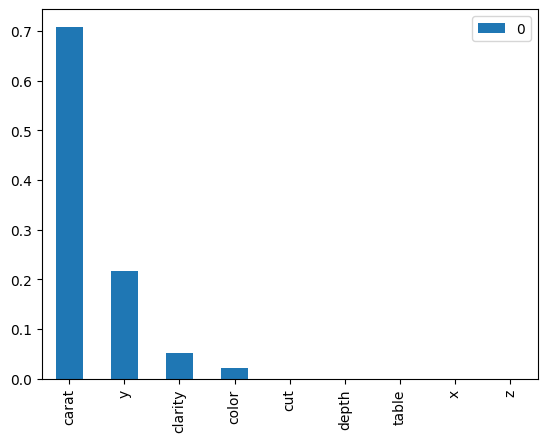

In [49]:
feature_names = X.columns
feature_importance = pd.DataFrame(clf.feature_importances_, index=feature_names).sort_values(0, ascending=False)
feature_importance.head(10).plot(kind='bar')

## Tree plot

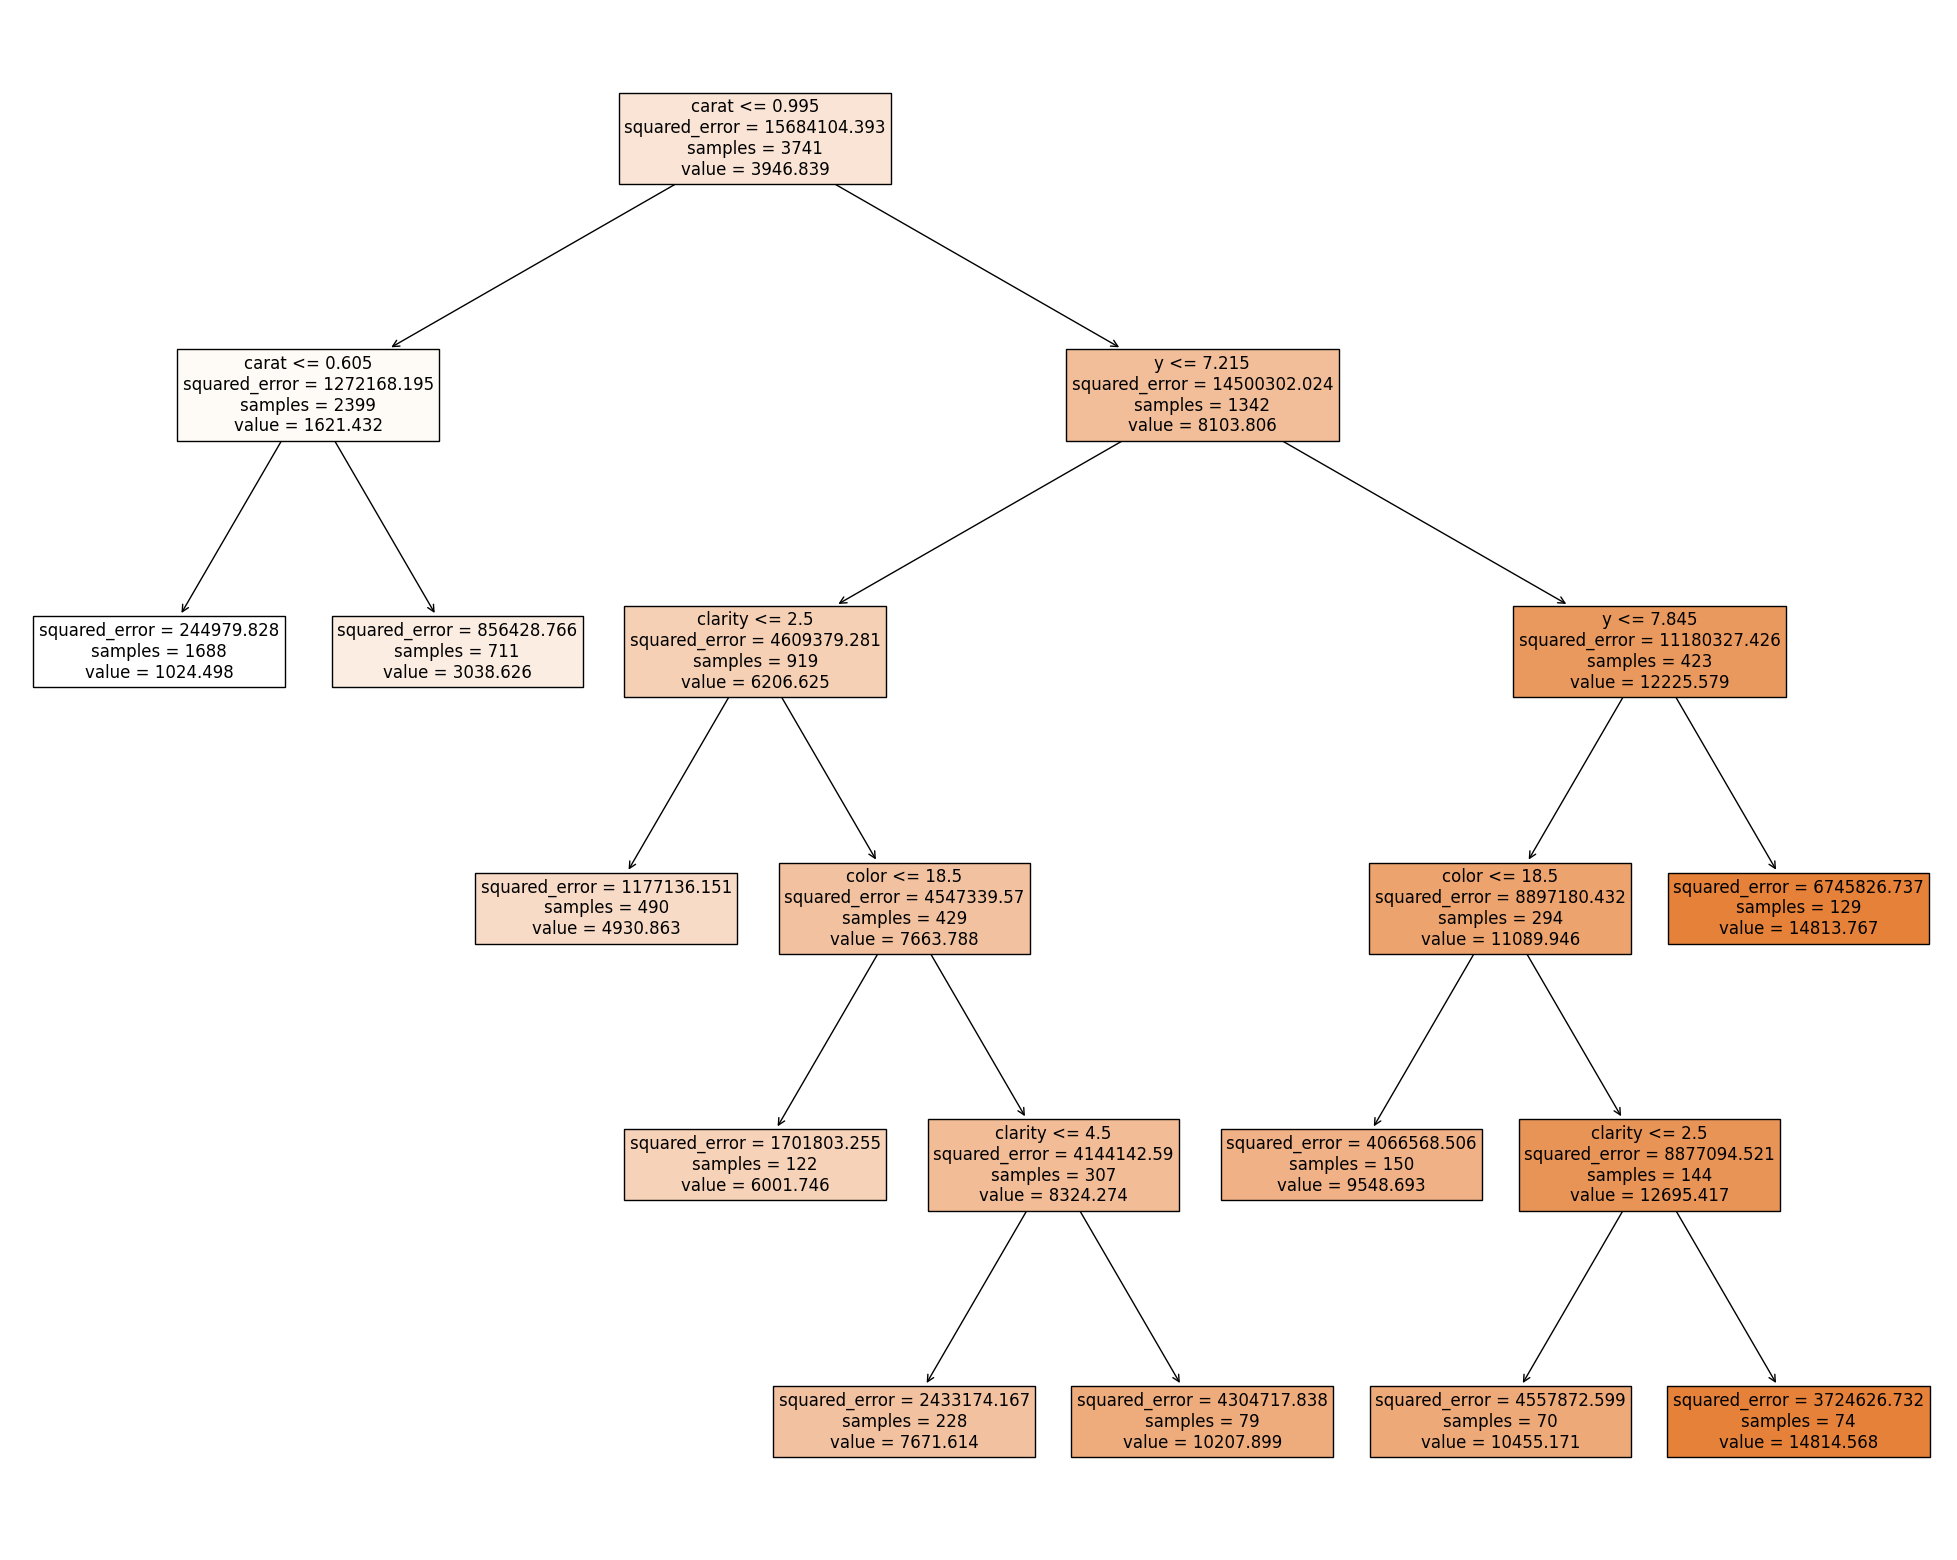

In [55]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(clf,
                   feature_names=feature_names,
                   filled=True,
                   fontsize=12)